In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set a nice plotting style
sns.set_style('whitegrid')

print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:
try:
    print("Loading pre-processed data...")
    phishing_df = pd.read_csv('phishing_features.csv')
    normal_df = pd.read_csv('normal_features.csv')
    print(f"-> Loaded {len(phishing_df)} phishing records and {len(normal_df)} normal records.")
except FileNotFoundError as e:
    print(f"FATAL ERROR: Could not find the required file: {e.filename}")
    print("Please make sure 'phishing_features.csv' and 'normal_features.csv' are in the same folder as this notebook.")

Loading pre-processed data...
-> Loaded 2576 phishing records and 517401 normal records.


In [ ]:
print("Calculating 80/20 split and combining data...")
n_phishing = len(phishing_df)
n_normal_needed = n_phishing * 9  # 90% is 9 times 10%

if len(normal_df) < n_normal_needed:
    print(f"WARNING: You have {len(normal_df)} normal emails, but {n_normal_needed} are needed for a perfect 80/20 split.")
    print("-> Using all available normal emails.")
    normal_sampled = normal_df
else:
    print(f"-> Sampling {n_normal_needed} normal emails from the available {len(normal_df)}.")
    normal_sampled = normal_df.sample(n=n_normal_needed, random_state=42)

# Combine the phishing data with the sampled normal data
final_df = pd.concat([phishing_df, normal_sampled], ignore_index=True)

# Shuffle the dataset to mix the phishing and normal emails randomly
final_df = final_df.sample(frac=1, random_state=42).reset_index(drop=True)

phish_percent = (final_df['label'].sum() / len(final_df)) * 100
print("-" * 50)
print("Dataset Assembled and Shuffled!")
print(f"Total emails in final dataset: {len(final_df)}")
print(f"Final composition: {len(phishing_df)} phishing, {len(normal_sampled)} normal.")
print(f"Phishing emails make up {phish_percent:.2f}% of the final dataset.")
print("-" * 50)

display(final_df.head())

Calculating 80/20 split and combining data...
-> Sampling 23184 normal emails from the available 517401.
--------------------------------------------------
Dataset Assembled and Shuffled!
Total emails in final dataset: 25760
Final composition: 2576 phishing, 23184 normal.
Phishing emails make up 10.00% of the final dataset.
--------------------------------------------------


,num_hyperlinks,num_suspicious_links,num_ip_urls,body_char_count,subject_char_count,urgency_keyword_count,num_capital_words,special_char_ratio,has_javascript,has_form_tag,processed_text,label
0,0,0,0,1442.0,61.0,0,0,0.071809,0,0,disco future meeting agenda material unless se...,0
1,0,0,0,703.0,14.0,0,0,0.029248,0,0,friday deskheads would like hour team building...,0
2,0,0,0,27.0,3.0,0,0,0.032258,0,0,mpc think,0
3,0,0,0,216.0,24.0,0,0,0.029046,0,0,priority legislation understanding languishing...,0
4,6,0,0,861.0,32.0,1,0,0.119687,0,0,payment detail update required netflix account...,1


Generating visualizations...


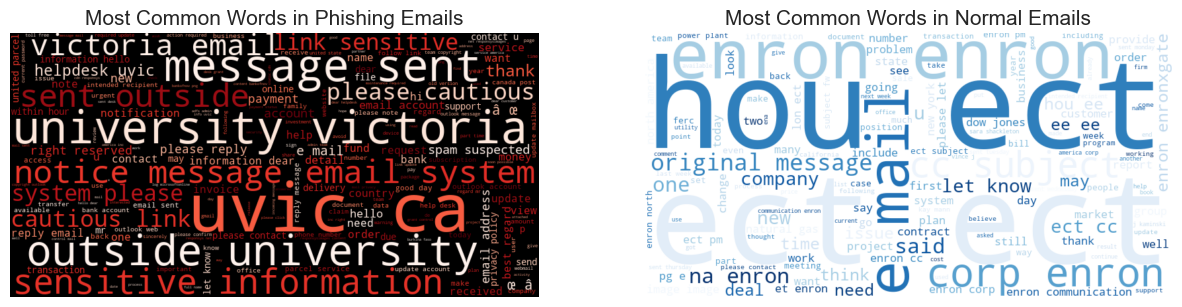


Comparing feature distributions...


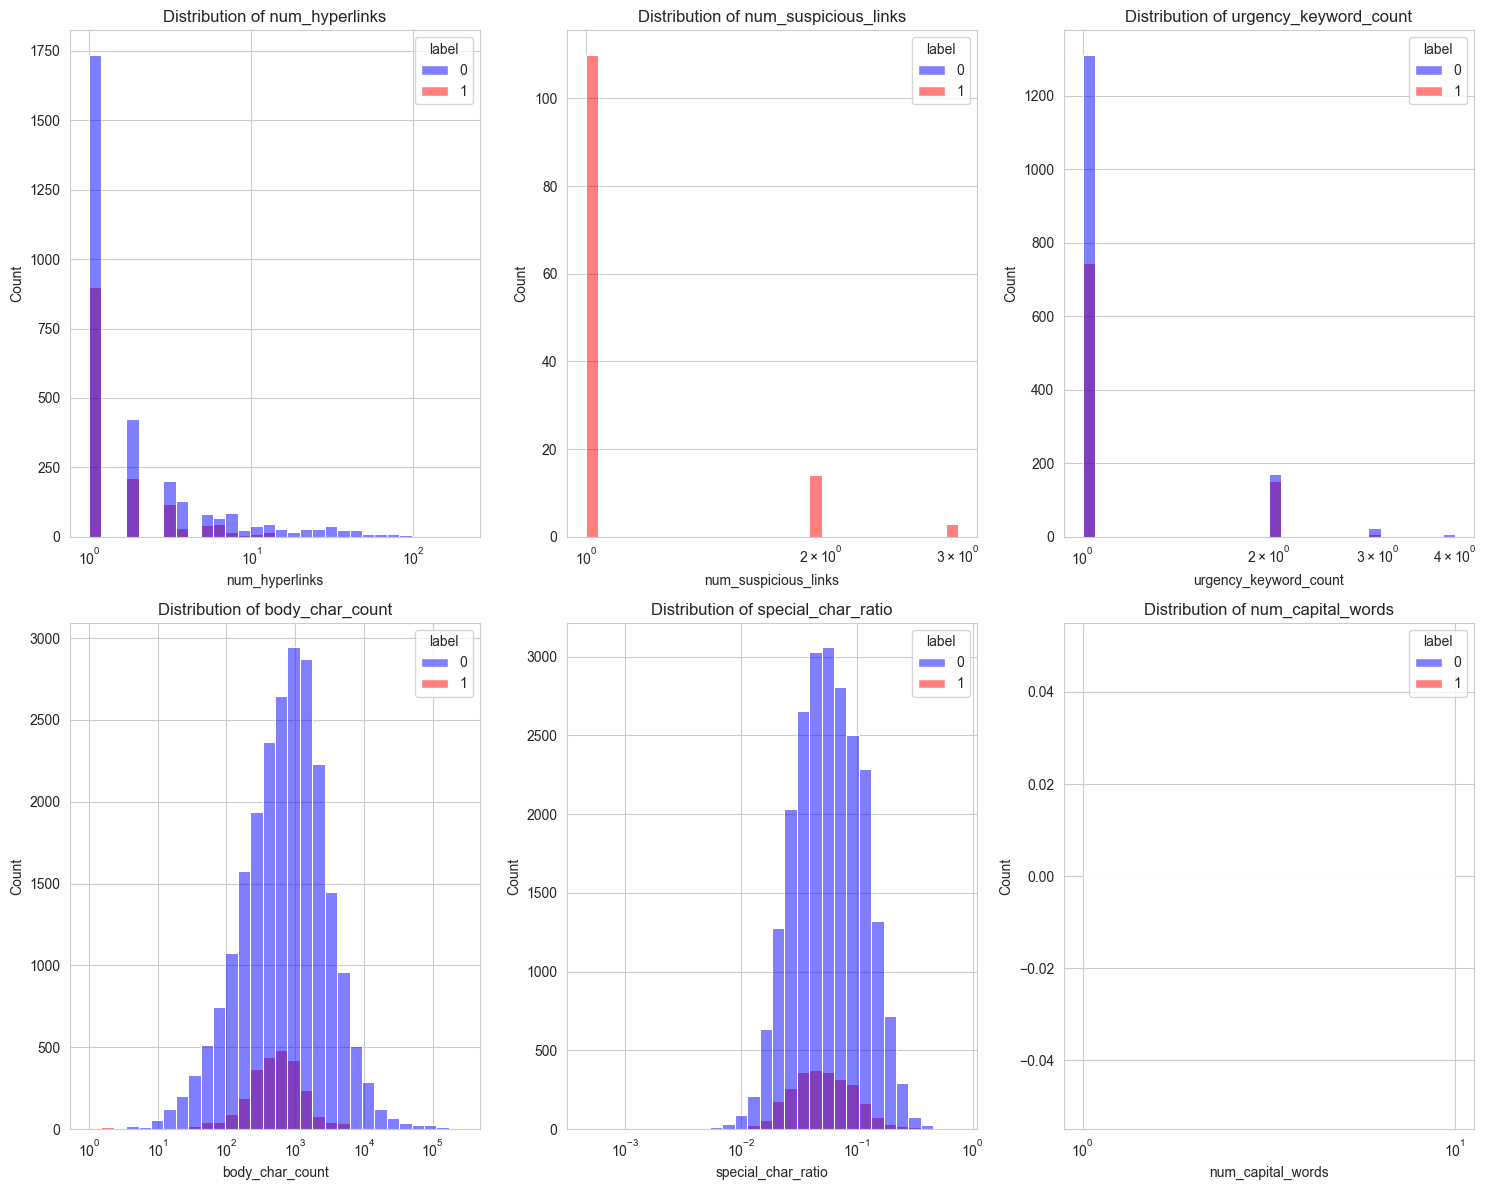

In [4]:
print("Generating visualizations...")

# 1. Word Cloud
plt.figure(figsize=(15, 8))

# Word cloud for phishing emails
plt.subplot(1, 2, 1)
# Ensure all text is a string to prevent errors
phishing_text = ' '.join(final_df[final_df['label'] == 1]['processed_text'].astype(str))
wordcloud_phish = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(phishing_text)
plt.imshow(wordcloud_phish, interpolation='bilinear')
plt.title('Most Common Words in Phishing Emails', fontsize=15)
plt.axis('off')

# Word cloud for normal emails
plt.subplot(1, 2, 2)
# Ensure all text is a string
normal_text = ' '.join(final_df[final_df['label'] == 0]['processed_text'].astype(str))
wordcloud_normal = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(normal_text)
plt.imshow(wordcloud_normal, interpolation='bilinear')
plt.title('Most Common Words in Normal Emails', fontsize=15)
plt.axis('off')

plt.show()


# 2. Feature Distribution Plots
feature_cols_to_plot = [
    'num_hyperlinks', 'num_suspicious_links', 'urgency_keyword_count', 
    'body_char_count', 'special_char_ratio', 'num_capital_words'
]

print("\nComparing feature distributions...")
plt.figure(figsize=(15, 12))
for i, col in enumerate(feature_cols_to_plot, 1):
    plt.subplot(2, 3, i)
    # Using a log scale is good for skewed data like counts
    sns.histplot(data=final_df, x=col, hue='label', bins=30, log_scale=True, palette={0: 'blue', 1: 'red'})
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [5]:
output_filename = 'ready_for_training.csv'
final_df.to_csv(output_filename, index=False, encoding='utf-8')

print("-" * 50)
print("FINAL STEP COMPLETE!")
print(f"The final, feature-engineered, and balanced dataset has been saved as '{output_filename}'.")
print("\nYou are now ready to begin the Machine Learning Training and Implementation phase.")

--------------------------------------------------
FINAL STEP COMPLETE!
The final, feature-engineered, and balanced dataset has been saved as 'ready_for_training.csv'.

You are now ready to begin the Machine Learning Training and Implementation phase.
